# Summary:

1) We can classify three clusters for the Pyber average fare based on the total rides and drivers per city class. Also, as the number of rides increases (particularly with the urban and suburban classes), the average fare generally decreases during the same period (see bubble chart). The people living in the rural area paid on average more than those in the urban area for their Pyber rides ($\$$35 per ride compared to $\$$25, see Fig. 5) during the first six months of 2018. The average fare paid by rural Pyber riders was more than three times than that of the urban area ($\$$55 for rural class and $\$$16 for urban class, see Fig. 6) Yet, the level of fluctuation in the average fair of the rural class is significant. Among otherss, it may be due to either of two facts: 1-1) the riders from some of the rural areas are required to commute longer distances, e.g. commute to urban areas, while the other rural riders request a Pyber for a local (short distance) ride. 1-2) the unit price per ride is not identical. The limited available data do not underpin the hypothesis to relate city type to Pyber fare.
       
2) In general, total rides, average fare, and total drivers per city are fairly correlated to the city class size: a majority of Pyber rides (and the average was requested by people from the urban area (68%). Also, the number of drivers per city is significantly higher in urban and suburban areas than those of rural areas (i.e., 80.9%, 16.5%, and 2.6% respectively). However, the share of total drivers in rural class is significantly lower than the ride and fairs share from the same class among three city classes (see pie charts). It implies that either there is undersupply of drivers in rural class or the regulations as imposed by the Pyber that causes riders from. These facts may elaborate the lower average fare in urban and suburban classes than rural type.
       
3) In general, it is difficult to conclude a well-defined trend of fare per city type based on the limited available data. A geographical size (or population) of city classes may help us to derive a more comprehensive conclusion on this study.

In [45]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from config import API
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
city_data = city_data.drop_duplicates('city', keep = 'first')
ride_data = pd.read_csv(ride_data_to_load)


In [3]:
# Combine the data into a single dataset
df=pd.merge(ride_data, city_data, on="city")
# Display the data table for preview
df_unique=df.drop_duplicates('city', keep = 'first').head().reset_index(drop=True)
df_unique.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

U= 24.499121716787847
R= 34.63776503126503


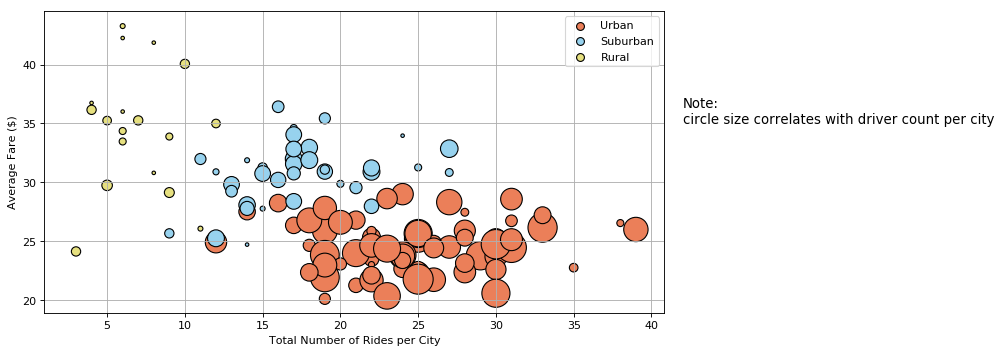

In [4]:
##### option 1: plot three scatter plots based on city type on the same plot

per_city=df.groupby(["city"])
city_share=pd.DataFrame({'Avg_fare':per_city.mean()['fare'],
                'Tot_ride': per_city['ride_id'].count(),
                'Tot_driver':per_city.mean()['driver_count'],
                'Type'   : city_data.set_index('city')['type']})
city_share.sort_values('Tot_driver', ascending = False)
# Separating data based on city type
#C = np.array([[230, 224, 127], [151, 210, 238], [235, 127, 89]]) #colors taken from imagecolorpicker
#color = [x / 255 for x in color_type_matplot['Urban']]
rgbc=255
color_type_matplot = {'Urban':[235/rgbc, 127/rgbc, 89/rgbc], 'Suburban':[151/rgbc, 210/rgbc, 238/rgbc], 'Rural':[230/rgbc, 224/rgbc, 127/rgbc]} #colors taken from imagecolorpicker

U = city_share[city_share['Type'] == 'Urban']
S = city_share[city_share['Type'] == 'Suburban']
R = city_share[city_share['Type']== 'Rural'] 
print("U=",U.mean()['Avg_fare'])
print("R=",R.mean()['Avg_fare'])
fig, ax = plt.subplots(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
l1=ax.scatter(U['Tot_ride'], U['Avg_fare'], s = U['Tot_driver']*10, color = color_type_matplot['Urban'], 
           edgecolor = 'black', alpha = 1.)
l2=ax.scatter(S['Tot_ride'], S['Avg_fare'], s = S['Tot_driver']*10, color = color_type_matplot['Suburban'], 
           edgecolor = 'black', alpha = 1)
l3=ax.scatter(R['Tot_ride'], R['Avg_fare'], s = R['Tot_driver']*10, color = color_type_matplot['Rural'], 
           edgecolor = 'black', alpha = 1)
ax.set_xlabel('Total Number of Rides per City')
ax.set_ylabel('Average Fare ($)')

ax.grid()

labels=['Urban', 'Suburban', 'Rural']
ax.text(42,35, "Note:\ncircle size correlates with driver count per city ", fontsize=12)
leg = plt.legend([l1, l2, l3], labels, ncol=1, frameon=True, fontsize=12,
    handlelength=1, loc = 'best', borderpad = 1.8,
    handletextpad=1, title='City Types:', scatterpoints = 1)

leg = plt.legend([l1, l2, l3], labels, fontsize=12, loc = 'best')
leg=plt.legend([l1, l2, l3], labels)
leg.legendHandles[0]._sizes = [50]
leg.legendHandles[1]._sizes = [50]
plt.savefig('bubble.jpg',bbox_inches="tight")


In [5]:
#Option 2: use the iplot from the plotly to plot the bubble chart in an interactive format

import plotly
plotly.tools.set_credentials_file(username='mbeygi', api_key=API)
import cufflinks as cf
from plotly.offline import iplot
color_type_iplot = {'Urban':'rgb(235, 127, 89)', 'Suburban':'rgb(151, 210, 238)', 'Rural':'rgb(230, 224, 127)'} #colors taken from imagecolorpicker

city_share.iplot(kind='bubble', x='Tot_ride', y='Avg_fare', size='Tot_driver', text='Type', 
           color=[color_type_iplot[i] for i in city_share.Type],
           xTitle='Total Number of Riders per City', yTitle='Average Fare ($)')

C:\Users\beygi\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Total Fares by City Type

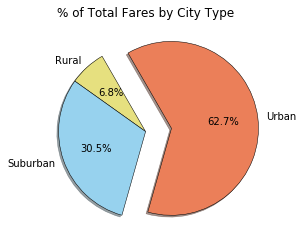

In [37]:
# Calculate Type Percents
tf = df.groupby('type').sum()['fare']
fsi=tf.index
# Build Pie Chart
pie1=plt.pie(tf, startangle = 120, colors = [color_type_matplot[x] for x in fsi], 
        explode = [0, 0, 0.3], labels = fsi, 
        autopct = "%1.1f%%", 
        shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.savefig('pie1.jpg',bbox_inches="tight")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig('pie1.jpg',bbox_inches="tight")

In [38]:
# Show Figure
plt.show()

## Total Rides by City Type

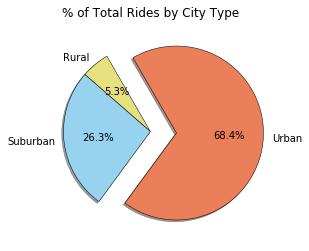

In [39]:
# Calculate Ride Percents
tr = df.groupby('type').count()['ride_id']
fsi=tr.index
# Build Pie Chart
pie2=plt.pie(tr, startangle = 120, colors = [color_type_matplot[x] for x in fsi], 
        explode = [0, 0, 0.3], labels = fsi, 
        autopct = "%1.1f%%", 
        shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title("% of Total Rides by City Type")
# Build Pie Chart

# Save Figure
plt.savefig('pie2.jpg',bbox_inches="tight")

In [9]:
# Show Figure
plt.show()

## Total Drivers by City Type

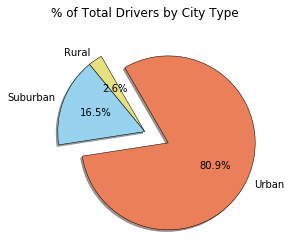

In [40]:
# Calculate Driver Percents
td=city_data.groupby('type').sum()['driver_count']
fsi=td.index
# Build Pie Chart
pie2=plt.pie(td, startangle = 120, colors = [color_type_matplot[x] for x in fsi], 
        explode = [0, 0, 0.3], labels = fsi,
        autopct = "%1.1f%%", 
        shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title("% of Total Drivers by City Type")
plt.savefig('pie3.jpg',bbox_inches="tight")

In [41]:
# Show Figure
plt.show()

## Fig. 5: Fare per ride by city type

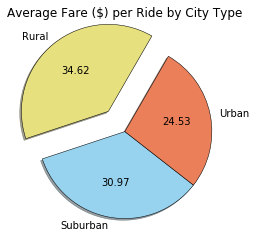

In [42]:
fr=tf.div(tr)
fsi=fr.index
# Build Pie Chart
pie3,tx,atxt=plt.pie(fr, startangle = 60, colors = [color_type_matplot[x] for x in fsi], 
        explode = [0.3, 0, 0.0], labels = fsi,
        autopct = "", 
        shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
for i, a in enumerate(atxt):
    a.set_text("{:02.2f}".format(fr[i]))
plt.title("Average Fare ($) per Ride by City Type")
plt.savefig('pie3.jpg',bbox_inches="tight")
plt.show()

## Fig. 6: Fare per Number of Drivers by City Type

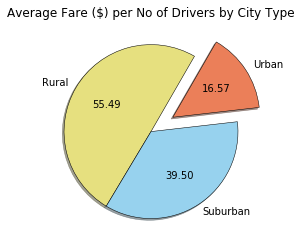

In [43]:
fd=tf.div(td)
fsi=fd.index
# Build Pie Chart
pie4,tx,atxt=plt.pie(fd, startangle = 60, colors = [color_type_matplot[x] for x in fsi], 
        explode = [0, 0, 0.3], labels = fsi,
        autopct = "", 
        shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
for i, a in enumerate(atxt):
    a.set_text("{:02.2f}".format(fd[i]))
plt.title("Average Fare ($) per No of Drivers by City Type")
plt.savefig('pie3.jpg',bbox_inches="tight")
plt.show()

In [12]:
!jupyter nbconvert --to script pyber_starter_solution.ipynb

[NbConvertApp] Converting notebook pyber_starter_solution.ipynb to script
[NbConvertApp] Writing 7051 bytes to pyber_starter_solution.py
